In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Data cleaning and preprocessing

Null values

In [4]:
# check the shape of the dataset
df.shape

(99999, 226)

In [5]:
# null values
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

mobile_number     0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
sep_vbc_3g        0
Length: 186, dtype: int64

### Duplicate values

In [10]:
# check duplicates
df.duplicated().sum()

0

## Data Type Conversion

In [11]:
# type of data
df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 186, dtype: object

## Churn Calculation

In [18]:
# total recharge amount
for i in df.columns:
    if 'rech' in i:
        print(i)

total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9


In [19]:
amount_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']
df[amount_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
count,84185.00000,84185.000000,84185.000000,84185.000000
mean,342.78887,346.879848,355.432726,337.679777
std,398.55893,413.131923,426.080618,413.961570
min,0.00000,0.000000,0.000000,0.000000
25%,110.00000,110.000000,130.000000,107.000000
50%,242.00000,244.000000,253.000000,240.000000
75%,452.00000,455.000000,466.000000,450.000000
max,35190.00000,40335.000000,45320.000000,37235.000000


In [20]:
# number of recharge
for i in df.columns:
    if 'rech' in i:
        print(i)

total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9


In [22]:
# total recharge number
num_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9']
df[num_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9
count,84185.000000,84185.000000,84185.000000,84185.000000
mean,7.900754,8.198943,7.810560,7.582752
std,7.044602,7.137915,7.289034,7.185306
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.000000,3.000000
50%,6.000000,6.000000,6.000000,5.000000
75%,10.000000,10.000000,10.000000,10.000000
max,307.000000,138.000000,138.000000,131.000000


In [23]:
df['total_rech_num_6'].value_counts()

4      10002
3       9366
5       9295
6       7924
2       6844
       ...  
307        1
97         1
117        1
89         1
110        1
Name: total_rech_num_6, Length: 97, dtype: int64

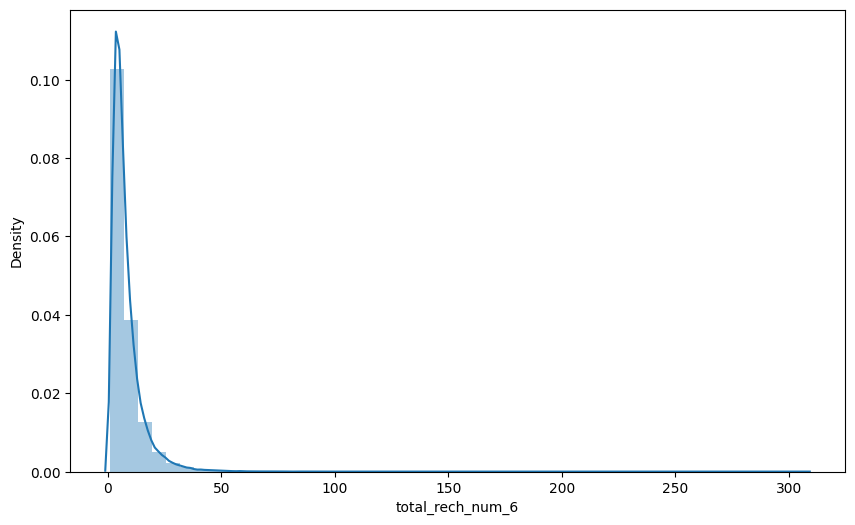

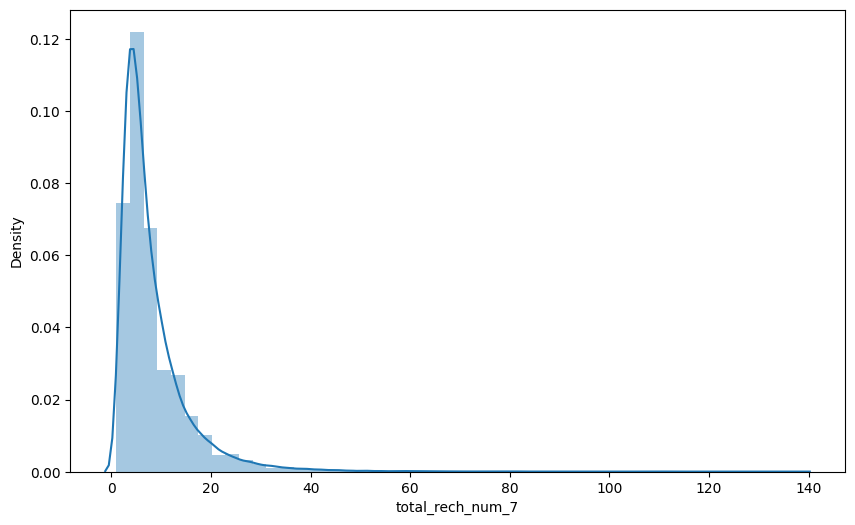

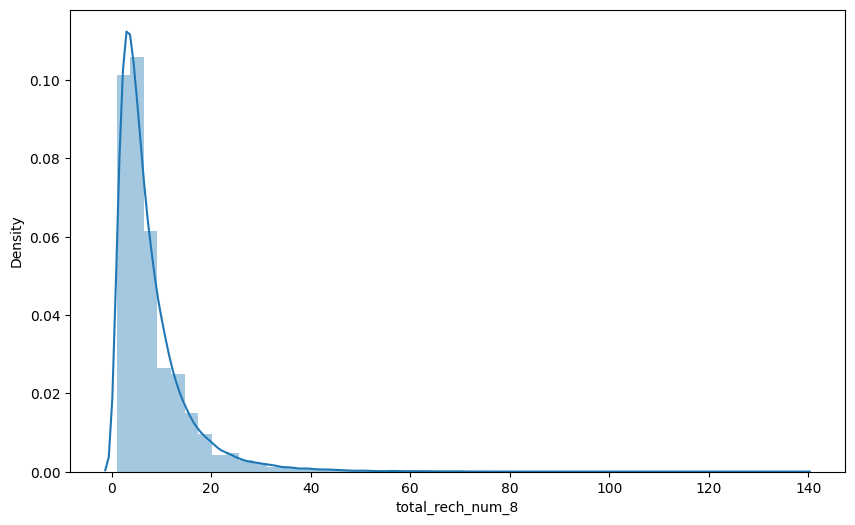

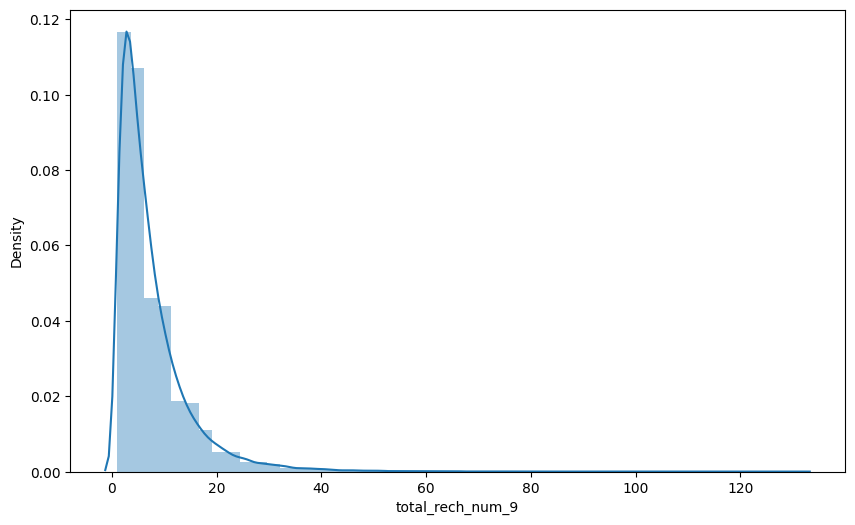

In [24]:
def plot_dist(df, col):
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])
    plt.show()

for i in num_cols:
    plot_dist(df, i)

In [26]:
def churn(df, col):
    if df[col] <= 3:
        return 1
    else:
        return 0
    
df['churn'] = df.apply(churn, axis=1, col='total_rech_num_9')

In [27]:
df['churn'].value_counts()

0    58663
1    25522
Name: churn, dtype: int64

In [28]:
# tendency to recharge
df['total_rech_num_6'].value_counts()

4      10002
3       9366
5       9295
6       7924
2       6844
       ...  
307        1
97         1
117        1
89         1
110        1
Name: total_rech_num_6, Length: 97, dtype: int64

In [29]:
def tendency(df, col):
    if df[col] <= 3:
        return 0
    elif df[col] <= 7:
        return 1
    else:
        return 2
    
df['tendency'] = df.apply(tendency, axis=1, col='total_rech_num_6')

In [30]:
df['tendency'].value_counts()

1    33556
2    31301
0    19328
Name: tendency, dtype: int64

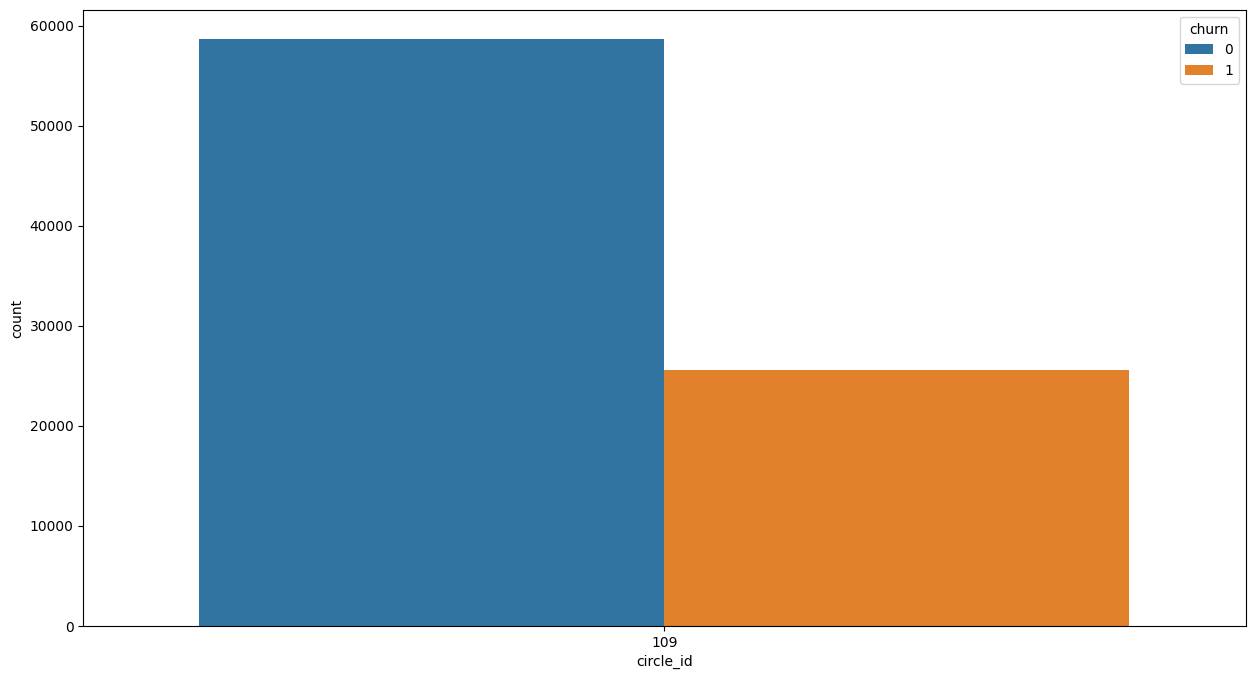

In [33]:
# plot the churn rate for each state
plt.figure(figsize=(15,8))
sns.countplot(x='circle_id', hue='churn', data=df)
plt.show()

In [34]:
# churn rate for each state
df.groupby('circle_id')['churn'].value_counts(normalize=True)

circle_id  churn
109        0        0.696834
           1        0.303166
Name: churn, dtype: float64

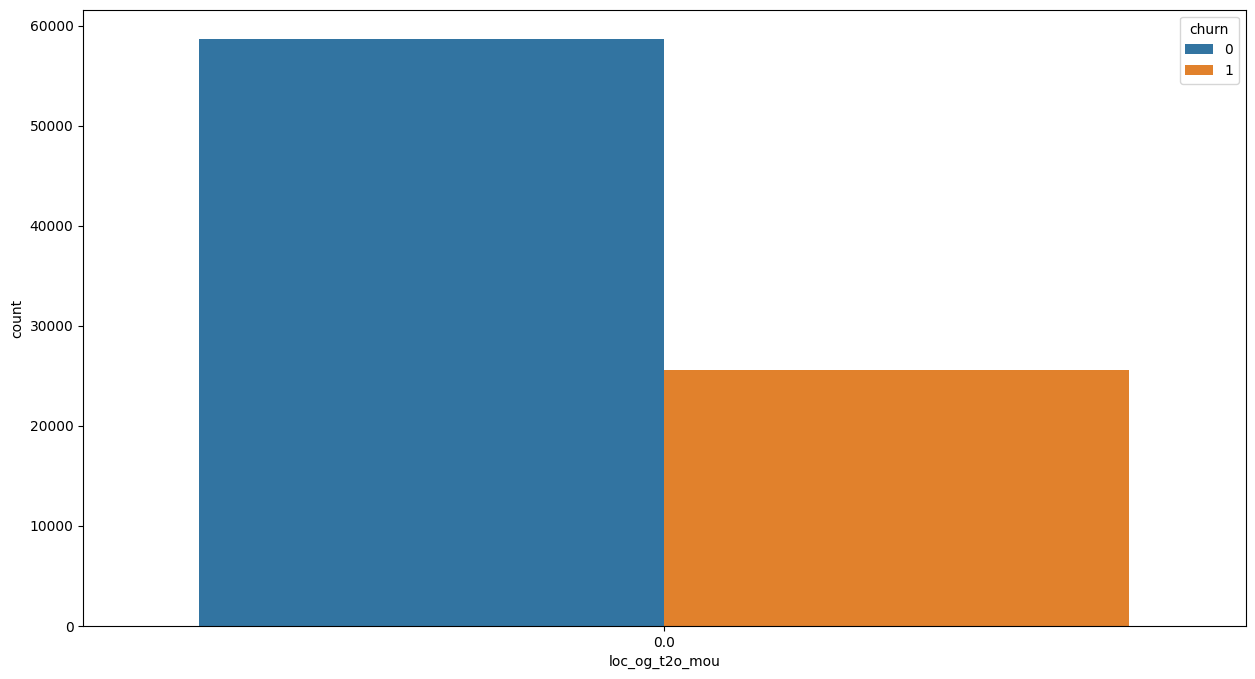

In [35]:
# plot the churn rate for each state
plt.figure(figsize=(15,8))
sns.countplot(x='loc_og_t2o_mou', hue='churn', data=df)
plt.show()

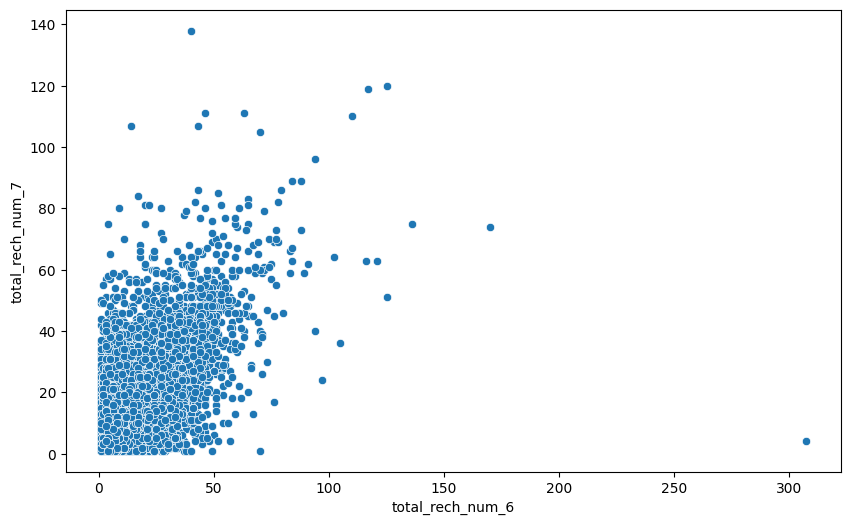

In [36]:
# scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_rech_num_6', y='total_rech_num_7', data=df)
plt.show()

## MONTHLY 2G AND 3G USAGE

In [37]:
# correlation
df.corr()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,tendency
mobile_number,1.000000,NaN,NaN,NaN,NaN,0.011887,0.005305,0.005205,0.009346,-0.001999,...,-0.011532,-0.011924,-0.012662,0.317398,-0.024135,-0.022673,-0.024932,-0.009244,0.022664,-0.033056
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,-0.022673,NaN,NaN,NaN,NaN,0.198202,0.224695,0.187813,0.180195,-0.011215,...,0.099484,0.078280,0.075001,0.007015,0.709889,1.000000,0.697170,0.168039,-0.043682,0.062909
jun_vbc_3g,-0.024932,NaN,NaN,NaN,NaN,0.225861,0.183980,0.176064,0.173520,-0.007965,...,0.087824,0.074248,0.078636,0.004566,0.608162,0.697170,1.000000,0.158403,-0.042636,0.077314
sep_vbc_3g,-0.009244,NaN,NaN,NaN,NaN,0.090772,0.099514,0.127787,0.168378,-0.000270,...,0.061408,0.067926,0.094339,-0.000840,0.208833,0.168039,0.158403,1.000000,-0.052038,0.040864
churn,0.022664,NaN,NaN,NaN,NaN,-0.188823,-0.199760,-0.232213,-0.301982,-0.126705,...,-0.057369,-0.060643,-0.077988,0.096685,-0.056305,-0.043682,-0.042636,-0.052038,1.000000,-0.361713


1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as
usual.

In [39]:
# 1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
high_value_cust = df[df['total_rech_amt_6'] >= 70]
print('Percentage of high value customers: ', round(high_value_cust.shape[0]/df.shape[0]*100, 2))

Percentage of high value customers:  84.72


2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she
gets a compelling offer from a competitor, faces unjust charges, becomes unhappy
with service quality etc. In this phase, the customer usually shows different behaviour
than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this
phase, since some corrective actions can be taken at this point (such as matching the
competitor’s offer/improving the service quality etc.)

In [40]:
Action_phase = high_value_cust[(high_value_cust['total_rech_amt_7'] < high_value_cust['total_rech_amt_6']) & (high_value_cust['total_rech_amt_8'] < high_value_cust['total_rech_amt_7'])]
print('Percentage of customers in action phase: ', round(Action_phase.shape[0]/df.shape[0]*100, 2))

Percentage of customers in action phase:  14.72


3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define
churn based on this phase. Also, it is important to note that at the time of prediction
(i.e. the action months), this data is not available to you for prediction. Thus, after
tagging churn as 1/0 based on this phase, you discard all data corresponding to this
phase.

In [42]:
chunk_phase = high_value_cust[(high_value_cust['total_rech_amt_7'] < high_value_cust['total_rech_amt_6']) & (high_value_cust['total_rech_amt_8'] > high_value_cust['total_rech_amt_7'])]
print('Percentage of customers in churn phase: ', round(chunk_phase.shape[0]/df.shape[0]*100, 2))

Percentage of customers in churn phase:  27.65


#### new dataframe with only high value customers

In [43]:
new_phase = high_value_cust[(high_value_cust['total_rech_amt_7'] > high_value_cust['total_rech_amt_6']) & (high_value_cust['total_rech_amt_8'] > high_value_cust['total_rech_amt_7'])]

In [44]:
new_phase.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,tendency
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,2491,0.00,0.00,0.0,0.0,0,2
19,7001754084,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,163.430,...,0,0,0,1104,454.53,466.06,0.0,0.0,1,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0,0,0,720,0.00,0.00,0.0,0.0,0,2
28,7001604038,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,117.392,...,0,1,0,502,0.36,0.00,0.0,0.0,0,0
36,7001146803,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,84.926,...,0,0,0,479,0.00,0.00,0.0,0.0,0,0


### Modelling

In [45]:
# important columns
Month_6 = ['total_ic_mou_6', 'total_og_mou_6', 'vol_2g_mb_6', 'vol_3g_mb_6']
Month_7 = ['total_ic_mou_7', 'total_og_mou_7', 'vol_2g_mb_7', 'vol_3g_mb_7']
Month_8 = ['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8']
Month_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [46]:
# dfs for each month
df_6 = new_phase[Month_6]
df_7 = new_phase[Month_7]
df_8 = new_phase[Month_8]
df_9 = new_phase[Month_9]

In [47]:
df_6.head()

,total_ic_mou_6,total_og_mou_6,vol_2g_mb_6,vol_3g_mb_6
3,280.08,223.23,0.00,0.0
19,33.19,4.56,514.81,0.0
21,207.09,860.34,0.00,0.0
28,329.18,69.76,0.00,0.0
36,161.39,74.13,0.00,0.0


In [48]:
df_7.head()

,total_ic_mou_7,total_og_mou_7,vol_2g_mb_7,vol_3g_mb_7
3,216.61,135.31,0.00,0.0
19,114.39,48.66,445.26,212.1
21,131.89,1028.79,0.00,0.0
28,76.69,50.73,0.00,0.0
36,696.53,83.41,0.00,0.0


In [49]:
df_8.head()

,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8
3,53.13,352.21,0.00,0.00
19,86.98,23.08,235.52,335.99
21,261.04,1068.54,0.00,0.00
28,329.98,83.43,6.71,145.15
36,781.53,415.43,0.00,0.00


In [50]:
df_9.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
3,305.38,362.54,0.0,0.0
19,50.38,25.31,0.0,0.0
21,252.61,1031.53,0.0,0.0
28,104.39,41.34,0.0,0.0
36,589.89,344.08,0.0,0.0


In [51]:
# attch the dfs with churn
df_6['churn'] = new_phase['churn']
df_7['churn'] = new_phase['churn']
df_8['churn'] = new_phase['churn']
df_9['churn'] = new_phase['churn']

In [52]:
dfs = [df_6, df_7, df_8, df_9]

for i in dfs:
    print(i.describe())

       total_ic_mou_6  total_og_mou_6   vol_2g_mb_6   vol_3g_mb_6  \
count    10695.000000    10695.000000  10695.000000  10695.000000   
mean       221.691814      312.475732     55.007311    117.462061   
std        296.790070      393.426445    224.793625    515.606837   
min          0.000000        0.000000      0.000000      0.000000   
25%         55.735000       85.040000      0.000000      0.000000   
50%        135.840000      186.080000      0.000000      0.000000   
75%        280.200000      390.945000      0.000000      0.000000   
max       7074.590000     7329.110000   7213.060000  20304.270000   

              churn  
count  10695.000000  
mean       0.181487  
std        0.385439  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  
       total_ic_mou_7  total_og_mou_7   vol_2g_mb_7   vol_3g_mb_7  \
count    10695.000000    10695.000000  10695.000000  10695.000000   
mean       260.801575      463.128891     

### Highest Churn month

In [61]:
# drop dates
new_phase.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

4. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance
using appropriate techniques).

In [62]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# split the data
X = new_phase.drop(['churn'], axis=1)
y = new_phase['churn']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Evaluate the models using appropriate evaluation metrics. Note that it is more
important to identify churners than the non-churners accurately - choose an
appropriate evaluation metric which reflects this business goal.

In [64]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy:  0.992832658148956
Confusion matrix:  [[2619    9]
 [  14  567]]
Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00      2628
           1       0.98      0.98      0.98       581

    accuracy                           0.99      3209
   macro avg       0.99      0.99      0.99      3209
weighted avg       0.99      0.99      0.99      3209

Accuracy:  1.0
Confusion matrix:  [[2628    0]
 [   0  581]]
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00       581

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209



6. Finally, choose a model based on some evaluation metric.
Therefore, build another model with the main objective of identifying important predictor
attributes which help the business understand indicators of churn. A good choice to identify
important variables is a logistic regression model or a model from the tree family. In the
Navigate Q&A

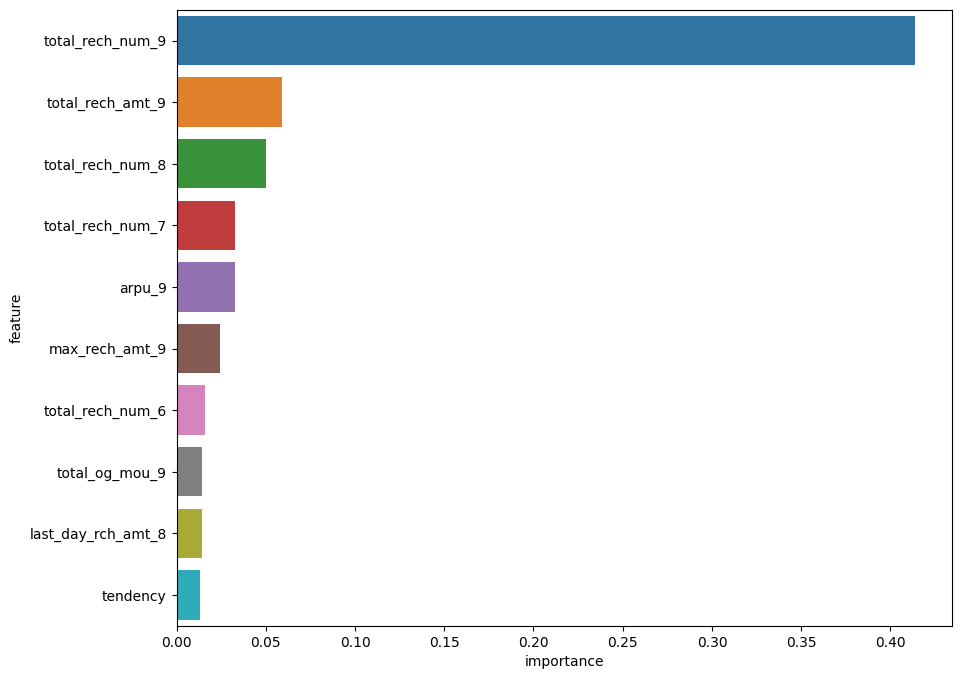

Accuracy:  1.0
Confusion matrix:  [[2628    0]
 [   0  581]]
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00       581

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209



In [65]:
# random forest
rf = RandomForestClassifier(n_estimators=500, max_depth=30)
rf.fit(X_train, y_train)

# feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.head(10)

# plot the feature importance
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.show()


# predict the churn
y_pred = rf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))